In [73]:
import csv
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
import statsmodels.tsa.arima_model 
from datetime import datetime, timedelta
from statsmodels.graphics.api import qqplot

%matplotlib notebook

In [2]:
df_data = pd.read_csv('data/preprocessed_input.csv')

In [3]:
df_data

,datetime,dayofweek,hour,dt0_10_total_vol,dt20_10_total_vol,dt40_10_total_vol,dt60_10_total_vol,dt80_10_total_vol,dt100_10_total_vol,dt120_10_total_vol,...,dt0_rel_humidity,dt0_precipitation,dt180_pressure,dt180_sea_pressure,dt180_wind_direction,dt180_wind_speed,dt180_temperature,dt180_rel_humidity,dt180_precipitation,is_holiday
0,2016-09-20 00:00:00,1,0,14,13,7,6,5,5,6,...,68.0,0.0,1013.5,1018.5,354.0,2.6,23.9,58.0,0.0,0
1,2016-09-20 03:00:00,1,3,10,8,5,11,8,15,9,...,58.0,0.0,1012.2,1017.2,7.0,4.6,26.9,43.0,0.0,0
2,2016-09-20 06:00:00,1,6,13,20,29,38,30,31,53,...,43.0,0.0,1012.6,1017.6,11.0,4.5,25.4,42.0,0.0,0
3,2016-09-20 09:00:00,1,9,51,68,59,56,60,63,57,...,42.0,0.0,1013.7,1018.7,25.0,1.7,22.1,53.0,0.0,0
4,2016-09-20 12:00:00,1,12,53,62,75,98,82,84,81,...,53.0,0.0,1014.0,1019.0,326.0,2.2,20.5,65.0,0.0,0
5,2016-09-20 15:00:00,1,15,71,64,73,48,57,48,38,...,65.0,0.0,1013.8,1018.8,327.0,1.4,19.4,74.0,0.0,0
6,2016-09-20 18:00:00,1,18,26,29,20,17,29,21,12,...,74.0,0.0,1014.1,1019.1,330.0,1.0,18.6,80.0,0.0,0
7,2016-09-20 21:00:00,1,21,17,29,37,30,17,19,20,...,80.0,0.0,1015.5,1020.5,219.0,0.7,21.7,69.0,0.0,0
8,2016-09-21 00:00:00,2,0,12,6,7,7,4,6,6,...,69.0,0.0,1015.4,1020.4,17.0,2.4,25.2,59.0,0.0,0
9,2016-09-21 03:00:00,2,3,5,6,10,16,14,11,10,...,59.0,0.0,1013.1,1018.1,328.0,3.0,26.2,56.0,0.0,0


## mean interpolation

In [4]:
df_travel_time_mean = df_data.filter(regex='A2_routetime_median').mean()
df_travel_time_mean

dt0_A2_routetime_median      58.987716
dt20_A2_routetime_median     56.697500
dt40_A2_routetime_median     58.456729
dt60_A2_routetime_median     60.798814
dt80_A2_routetime_median     58.740282
dt100_A2_routetime_median    59.540616
dt120_A2_routetime_median    59.407668
dt140_A2_routetime_median    57.839552
dt160_A2_routetime_median    58.229879
dt180_A2_routetime_median    58.954928
dt200_A2_routetime_median    56.697500
dt220_A2_routetime_median    58.476103
dtype: float64

In [5]:
df_travel_time = df_data.filter(regex='A2_routetime_median').fillna(df_travel_time_mean)
df_travel_time

,dt0_A2_routetime_median,dt20_A2_routetime_median,dt40_A2_routetime_median,dt60_A2_routetime_median,dt80_A2_routetime_median,dt100_A2_routetime_median,dt120_A2_routetime_median,dt140_A2_routetime_median,dt160_A2_routetime_median,dt180_A2_routetime_median,dt200_A2_routetime_median,dt220_A2_routetime_median
0,65.775000,56.6975,54.330000,60.798814,50.910000,58.850000,59.407668,75.640000,58.229879,44.105000,46.0100,75.460000
1,44.105000,46.0100,75.460000,43.580000,60.940000,47.320000,59.407668,49.960000,47.775000,58.954928,93.1900,41.090000
2,58.987716,93.1900,41.090000,71.140000,55.660000,56.325000,59.720000,49.520000,82.310000,67.690000,60.0600,82.450000
3,67.690000,60.0600,82.450000,71.680000,54.290000,79.190000,60.640000,78.335000,66.980000,65.480000,77.8550,65.260000
4,65.480000,77.8550,65.260000,68.890000,74.820000,52.730000,59.070000,52.255000,84.525000,52.320000,60.8500,50.560000
5,52.320000,60.8500,50.560000,72.330000,87.900000,61.875000,60.320000,55.275000,58.810000,66.220000,64.1300,60.010000
6,66.220000,64.1300,60.010000,51.820000,42.050000,74.705000,54.280000,57.850000,54.695000,92.970000,59.8950,44.530000
7,92.970000,59.8950,44.530000,39.325000,44.590000,43.720000,65.950000,52.740000,45.910000,57.155000,38.5450,32.300000
8,57.155000,38.5450,32.300000,102.170000,58.740282,43.520000,46.130000,53.155000,40.005000,52.120000,40.4800,38.000000
9,52.120000,40.4800,38.000000,67.500000,26.080000,50.970000,40.350000,44.370000,47.400000,58.995000,56.2600,48.440000


## Create Time Axis

In [6]:
time_len = len(df_travel_time)*len(df_travel_time.iloc[0,0:9])
travel_time_index = [pd.to_datetime(df_data.iloc[0,0])]*time_len + \
np.arange(time_len)*timedelta(minutes=20)
travel_time_index

array([Timestamp('2016-09-20 00:00:00'), Timestamp('2016-09-20 00:20:00'),
       Timestamp('2016-09-20 00:40:00'), ...,
       Timestamp('2016-10-18 02:00:00'), Timestamp('2016-10-18 02:20:00'),
       Timestamp('2016-10-18 02:40:00')], dtype=object)

## Create Indexed Route Travel Time Axis

In [7]:
travel_time = pd.Series(pd.DataFrame.as_matrix(df_travel_time.iloc[:,0:9]).reshape(-1))
travel_time.index = pd.Index(travel_time_index)
travel_time    

2016-09-20 00:00:00    65.775000
2016-09-20 00:20:00    56.697500
2016-09-20 00:40:00    54.330000
2016-09-20 01:00:00    60.798814
2016-09-20 01:20:00    50.910000
2016-09-20 01:40:00    58.850000
2016-09-20 02:00:00    59.407668
2016-09-20 02:20:00    75.640000
2016-09-20 02:40:00    58.229879
2016-09-20 03:00:00    44.105000
2016-09-20 03:20:00    46.010000
2016-09-20 03:40:00    75.460000
2016-09-20 04:00:00    43.580000
2016-09-20 04:20:00    60.940000
2016-09-20 04:40:00    47.320000
2016-09-20 05:00:00    59.407668
2016-09-20 05:20:00    49.960000
2016-09-20 05:40:00    47.775000
2016-09-20 06:00:00    58.987716
2016-09-20 06:20:00    93.190000
2016-09-20 06:40:00    41.090000
2016-09-20 07:00:00    71.140000
2016-09-20 07:20:00    55.660000
2016-09-20 07:40:00    56.325000
2016-09-20 08:00:00    59.720000
2016-09-20 08:20:00    49.520000
2016-09-20 08:40:00    82.310000
2016-09-20 09:00:00    67.690000
2016-09-20 09:20:00    60.060000
2016-09-20 09:40:00    82.450000
          

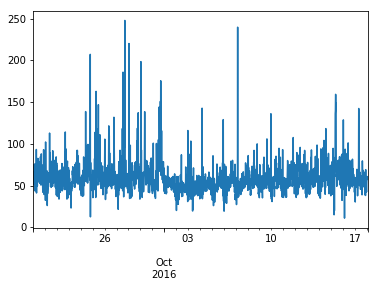

In [8]:
travel_time.plot()
plt.show()

In [9]:
sm.tsa.stattools.adfuller(travel_time)[:2]

(-8.7010140439136361, 3.8092858604890989e-14)

The p-value << 0.05, so we reject the null hypothesis that there is a unit root. No differencing is required.

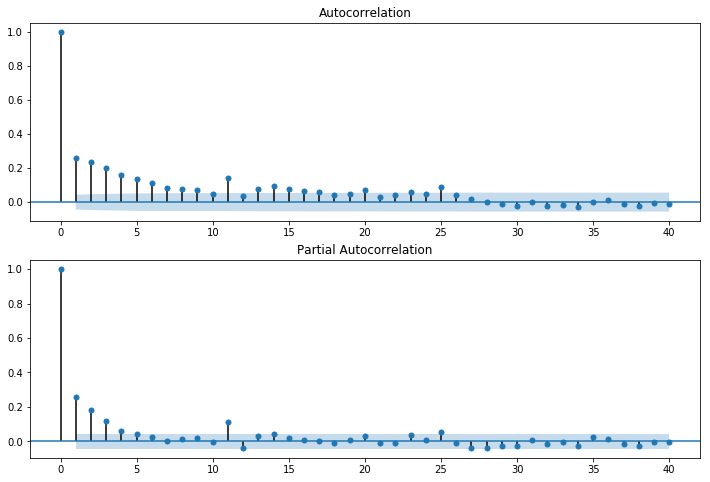

In [10]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(travel_time.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(travel_time, lags=40, ax=ax2)
fig

ACF plot shows this is a MA(l) model, where l>=1

PACF plot shows this is a AR(k) model, where k>=1

In [75]:
travel_ts=statsmodels.tsa.arima_model.ARIMA(travel_time, (1,0,0)).fit()

In [76]:
print travel_ts.params

const      58.532192
ar.L1.y     0.263967
dtype: float64


In [77]:
print travel_ts.summary()

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 2025
Model:                     ARMA(1, 0)   Log Likelihood               -8742.118
Method:                       css-mle   S.D. of innovations             18.140
Date:                Sat, 06 May 2017   AIC                          17490.237
Time:                        13:17:36   BIC                          17507.077
Sample:                    09-20-2016   HQIC                         17496.416
                         - 10-18-2016                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         58.5322      0.548    106.890      0.000      57.459      59.605
ar.L1.y        0.2640      0.021     12.319      0.000       0.222       0.306
                                    Roots           

<IPython.core.display.Javascript object>


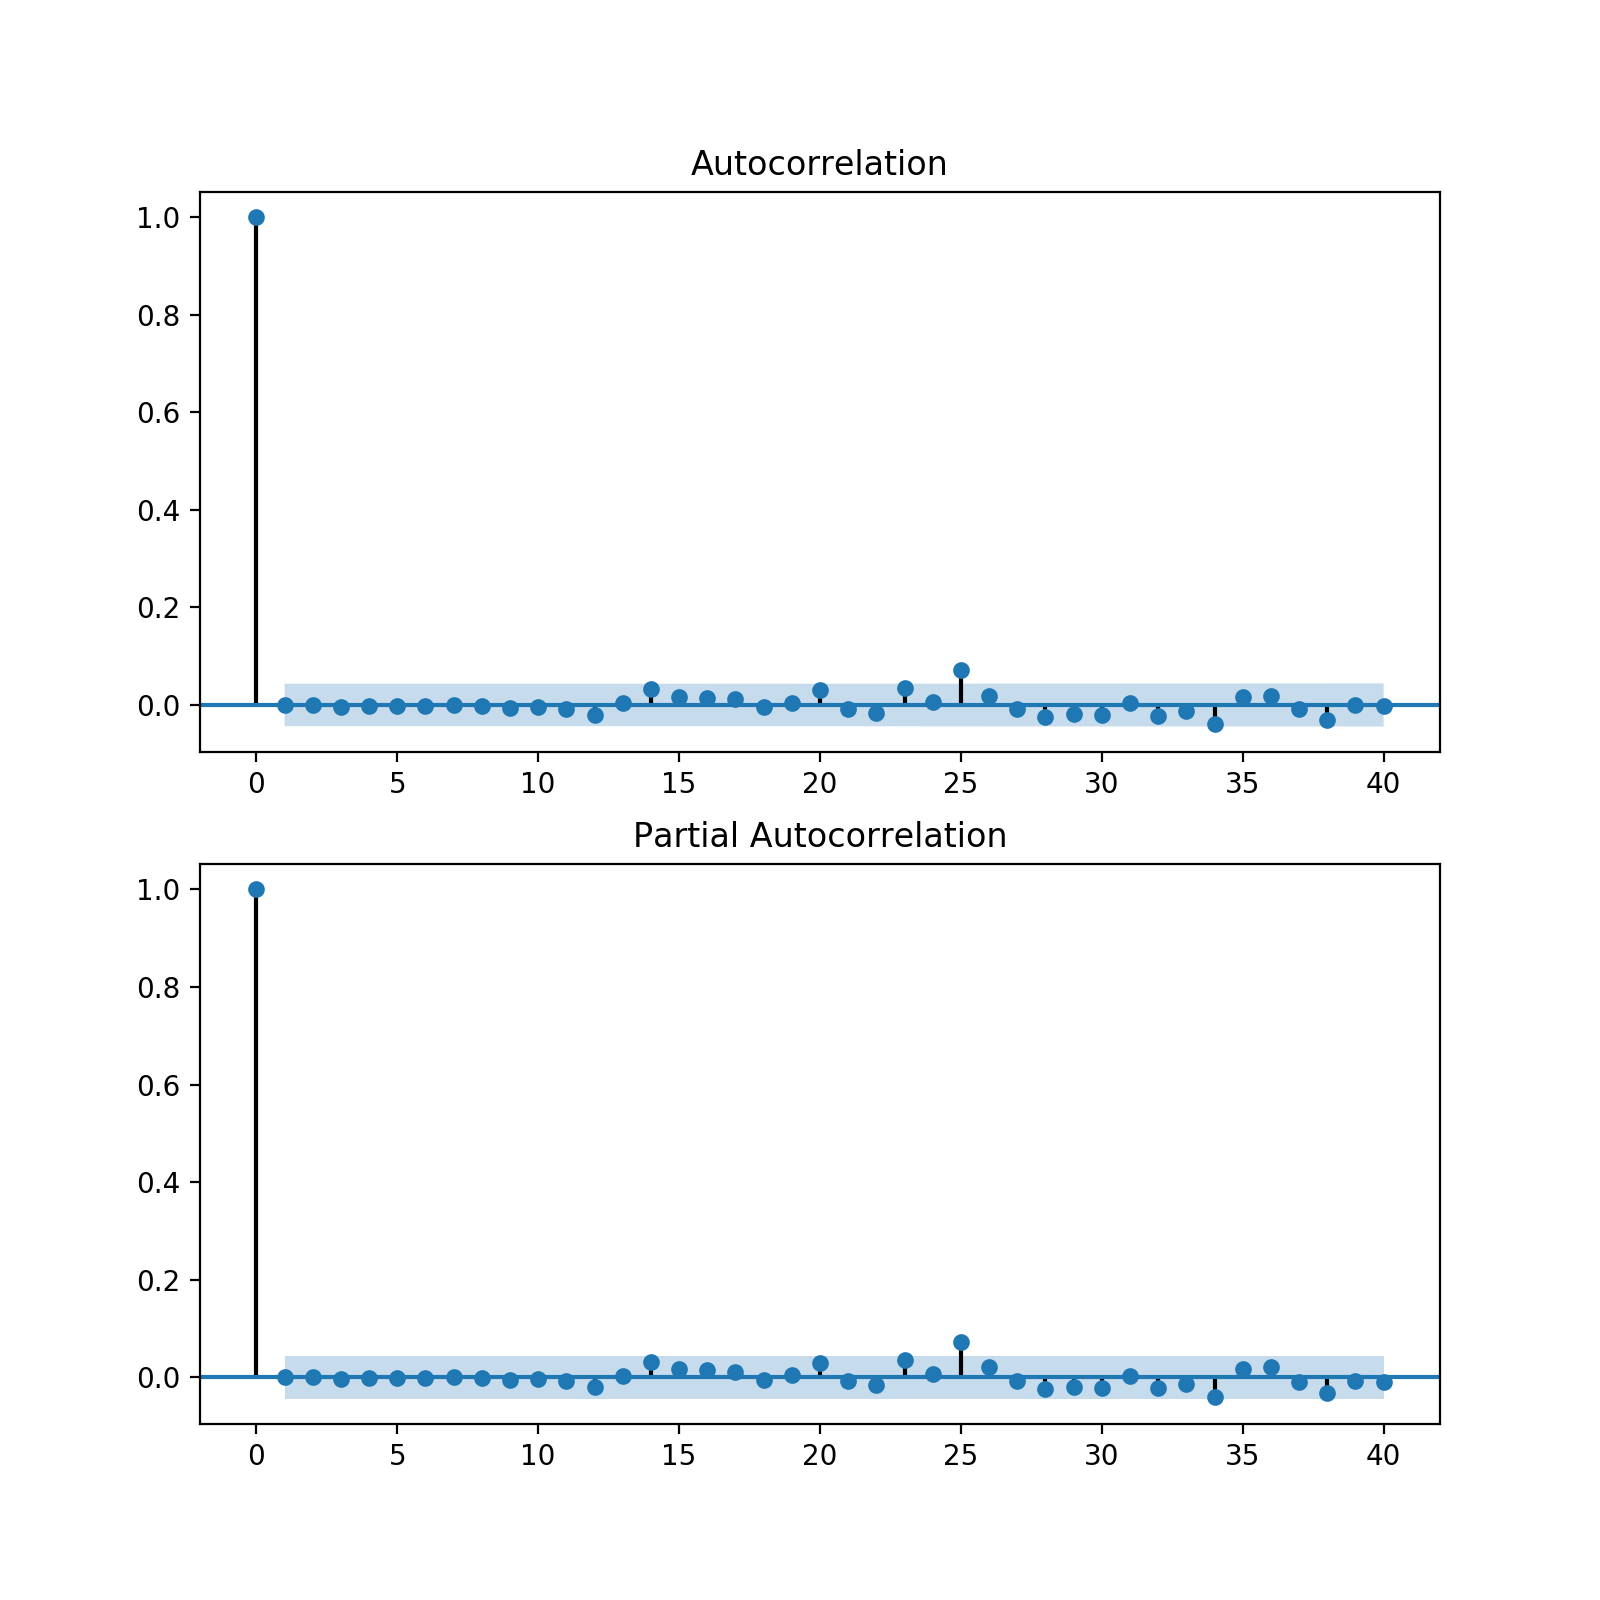

<IPython.core.display.Javascript object>


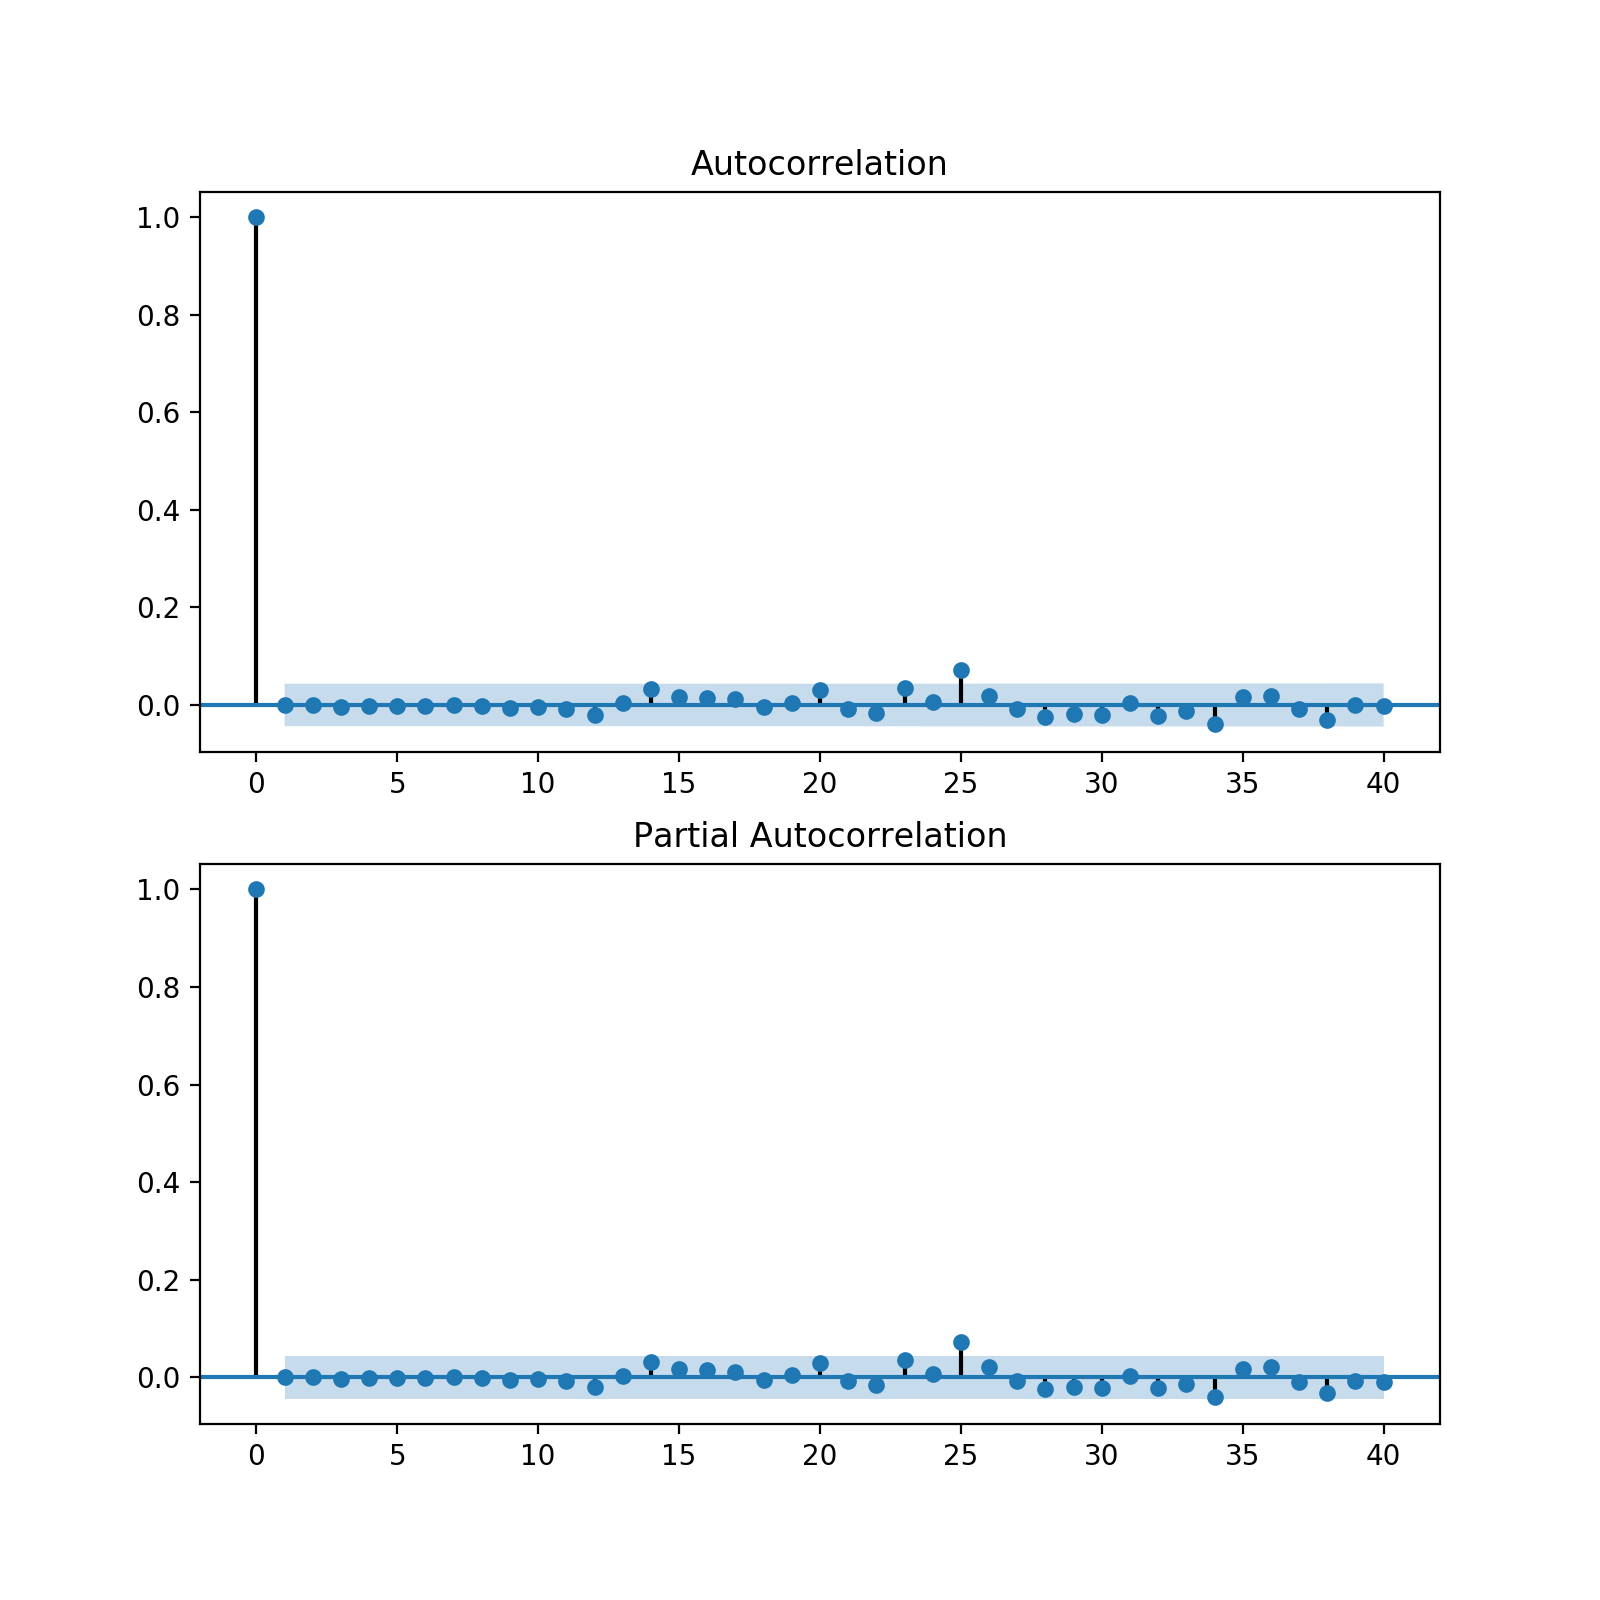

In [104]:
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(travel_ts.resid.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(travel_ts.resid, lags=40, ax=ax2)
fig

The ACF and PACF plots show the residual of the model is white noise, hence showing as a good predictive model.

<IPython.core.display.Javascript object>


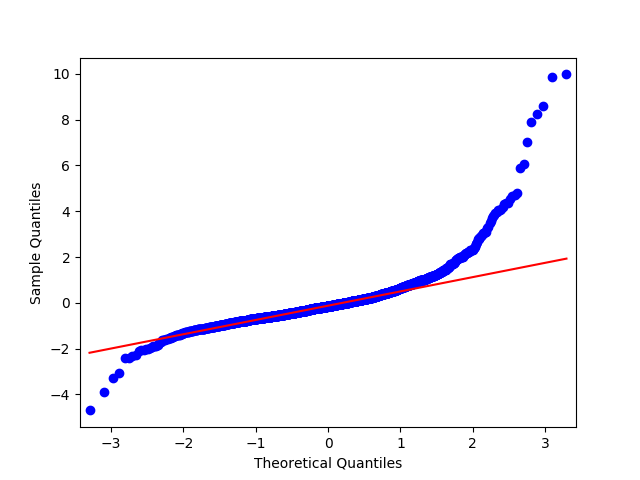

<IPython.core.display.Javascript object>


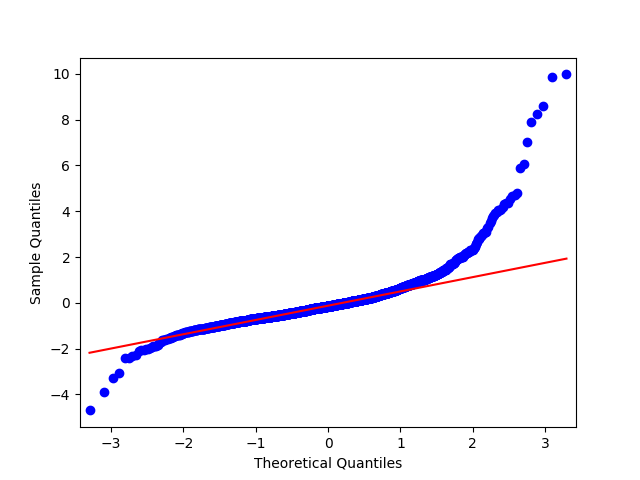

In [79]:
resid = travel_ts.resid
qqplot(resid,line='q',fit=True)

The points approximately lie in the line y=x, providing evidence of standard normal distribution. 

In [80]:
resid

2016-09-20 00:00:00     7.242808
2016-09-20 00:20:00    -6.264057
2016-09-20 00:40:00    -3.053356
2016-09-20 01:00:00    -3.167951
2016-09-20 01:20:00    -6.493153
2016-09-20 01:40:00     2.329817
2016-09-20 02:00:00    -3.093583
2016-09-20 02:20:00    17.902268
2016-09-20 02:40:00    -8.963094
2016-09-20 03:00:00   -13.253279
2016-09-20 03:20:00    -8.713885
2016-09-20 03:40:00    20.233257
2016-09-20 04:00:00   -19.420580
2016-09-20 04:20:00     6.354697
2016-09-20 04:40:00   -11.847775
2016-09-20 05:00:00    -0.050040
2016-09-20 05:20:00    -7.777732
2016-09-20 05:40:00    -8.494414
2016-09-20 06:00:00     0.977355
2016-09-20 06:20:00    35.149366
2016-09-20 06:40:00   -26.590720
2016-09-20 07:00:00    17.211976
2016-09-20 07:20:00    -6.200241
2016-09-20 07:40:00    -1.449028
2016-09-20 08:00:00     1.770434
2016-09-20 08:20:00    -9.325735
2016-09-20 08:40:00    26.156732
2016-09-20 09:00:00     2.881244
2016-09-20 09:20:00    -0.889554
2016-09-20 09:40:00    23.514516
          

Akaike information criterion (AIC) is a measure of the relative quality of statistical models for a given set of data. The smaller AIC, the better the statistical model for prediction.

In [105]:
travel_ts.aic

17375.339191607658

Visualization of the performance

<IPython.core.display.Javascript object>


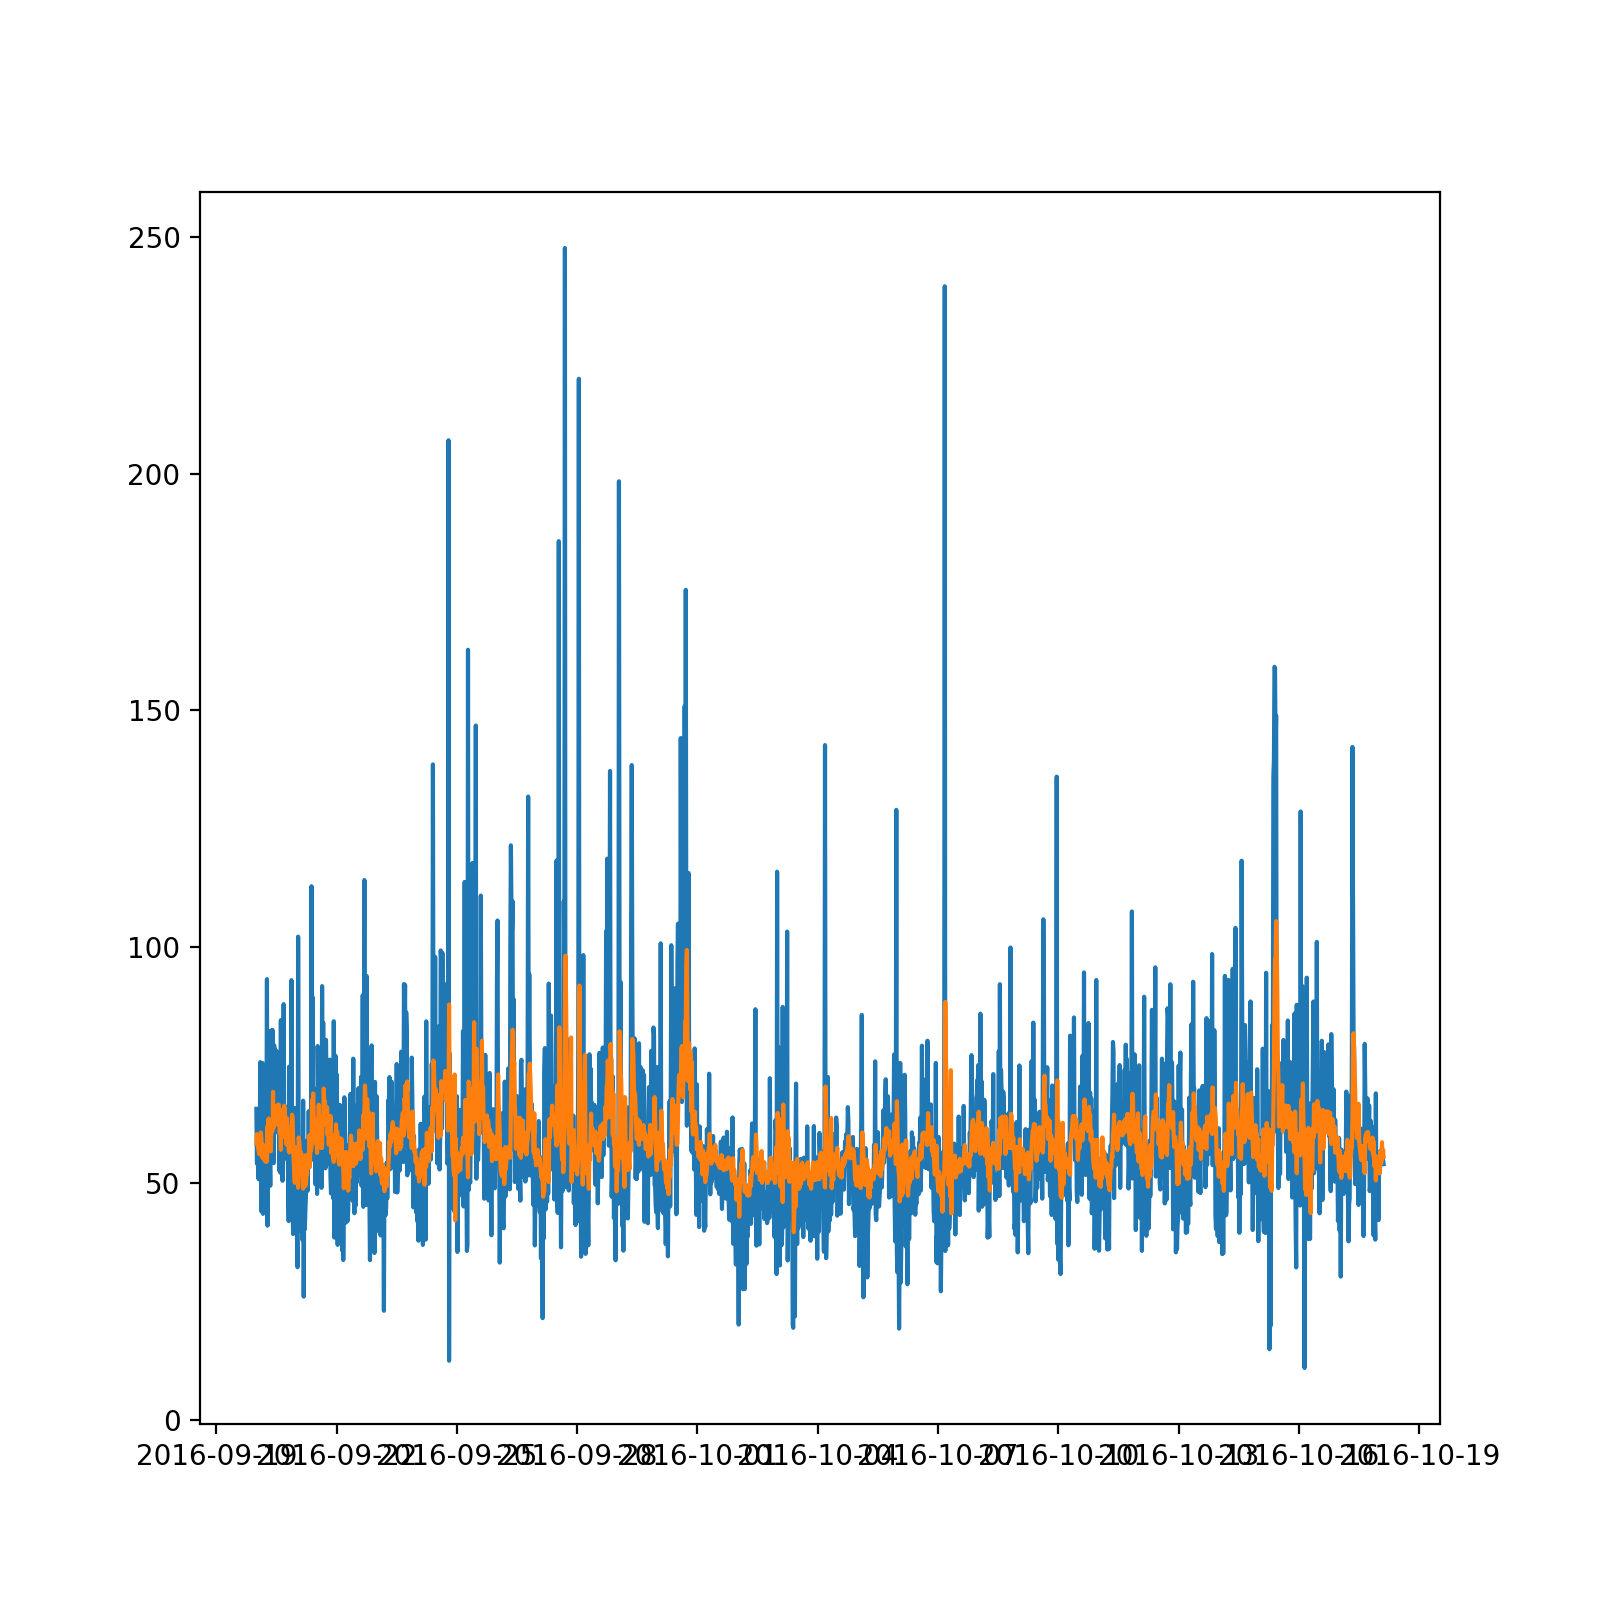

In [106]:
fig = plt.figure(figsize=(8, 8))
plt.plot(travel_time)
plt.plot(travel_ts.fittedvalues)
plt.show()

## median interpolation

In [19]:
df_travel_time_median = df_data.filter(regex='A2_routetime_median').median()
df_travel_time_median

dt0_A2_routetime_median      56.6700
dt20_A2_routetime_median     54.1800
dt40_A2_routetime_median     55.3950
dt60_A2_routetime_median     54.2550
dt80_A2_routetime_median     57.1700
dt100_A2_routetime_median    55.4100
dt120_A2_routetime_median    55.5225
dt140_A2_routetime_median    54.9300
dt160_A2_routetime_median    54.0850
dt180_A2_routetime_median    56.5700
dt200_A2_routetime_median    54.1800
dt220_A2_routetime_median    55.4600
dtype: float64

In [20]:
df_travel_time = df_data.filter(regex='A2_routetime_median').fillna(df_travel_time_median)

time_len = len(df_travel_time)*len(df_travel_time.iloc[0,0:9])
travel_time_index = [pd.to_datetime(df_data.iloc[0,0])]*time_len + \
np.arange(time_len)*timedelta(minutes=20)

travel_time = pd.Series(pd.DataFrame.as_matrix(df_travel_time.iloc[:,0:9]).reshape(-1))
travel_time.index = pd.Index(travel_time_index)

In [21]:
sm.tsa.stattools.adfuller(travel_time)[:2]

(-8.6084479125544817, 6.5745179920433426e-14)

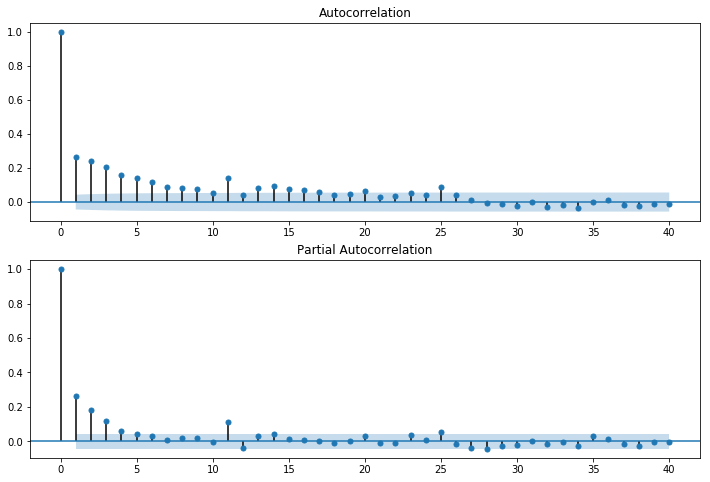

In [22]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(travel_time.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(travel_time, lags=40, ax=ax2)
fig

In [112]:
travel_ts=statsmodels.tsa.arima_model.ARIMA(travel_time, (11,0,1)).fit()

In [113]:
print travel_ts.summary()

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 2025
Model:                    ARMA(11, 1)   Log Likelihood               -8673.670
Method:                       css-mle   S.D. of innovations             17.536
Date:                Sat, 06 May 2017   AIC                          17375.339
Time:                        13:46:56   BIC                          17453.926
Sample:                    09-20-2016   HQIC                         17404.176
                         - 10-18-2016                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         58.5198      0.949     61.670      0.000      56.660      60.380
ar.L1.y       -0.1286      0.153     -0.841      0.400      -0.428       0.171
ar.L2.y        0.1953      0.036      5.469      0.0

<IPython.core.display.Javascript object>


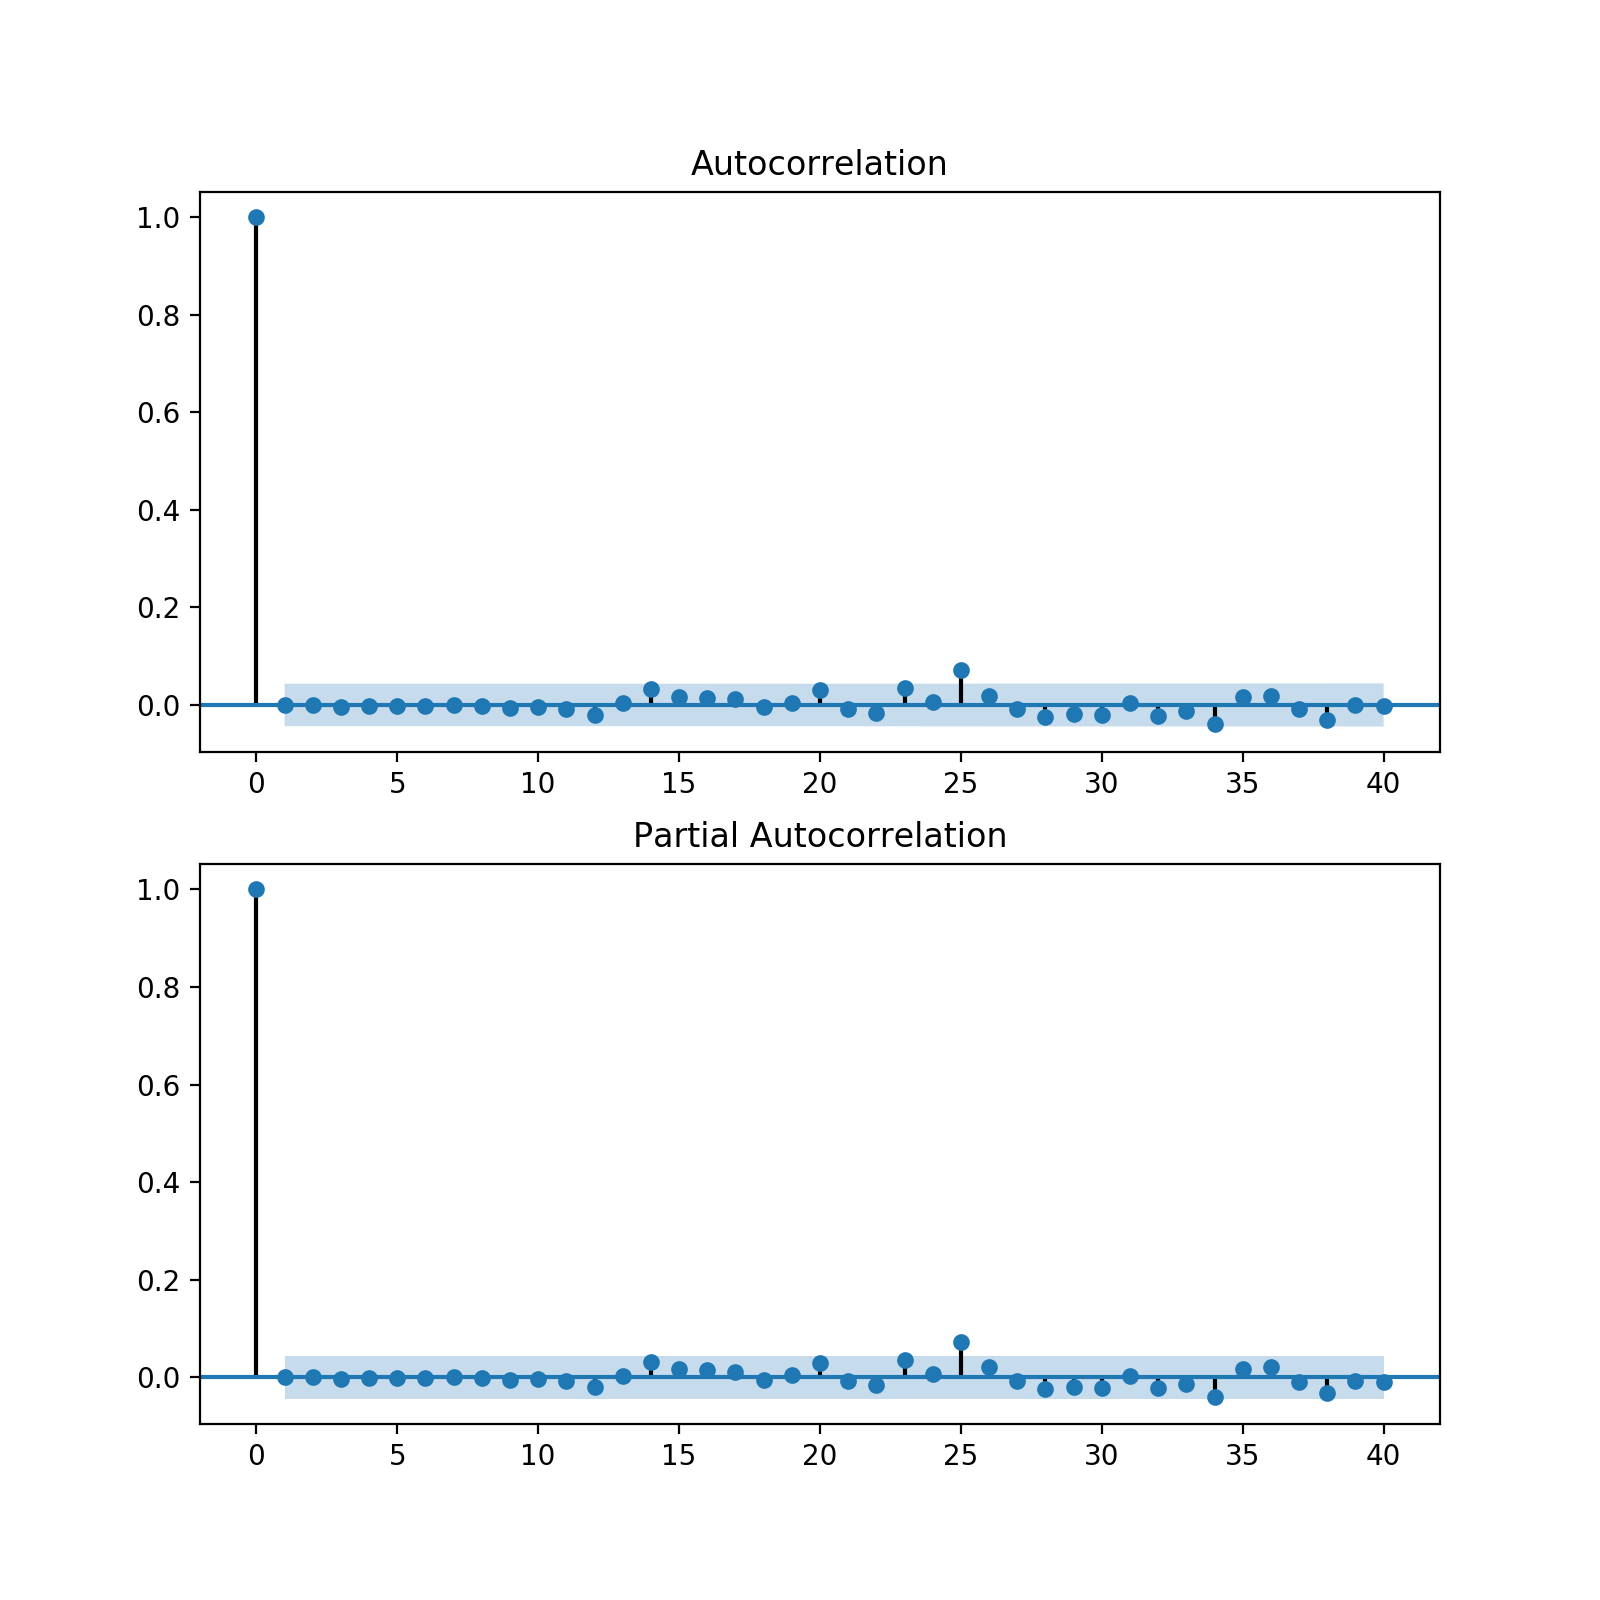

<IPython.core.display.Javascript object>


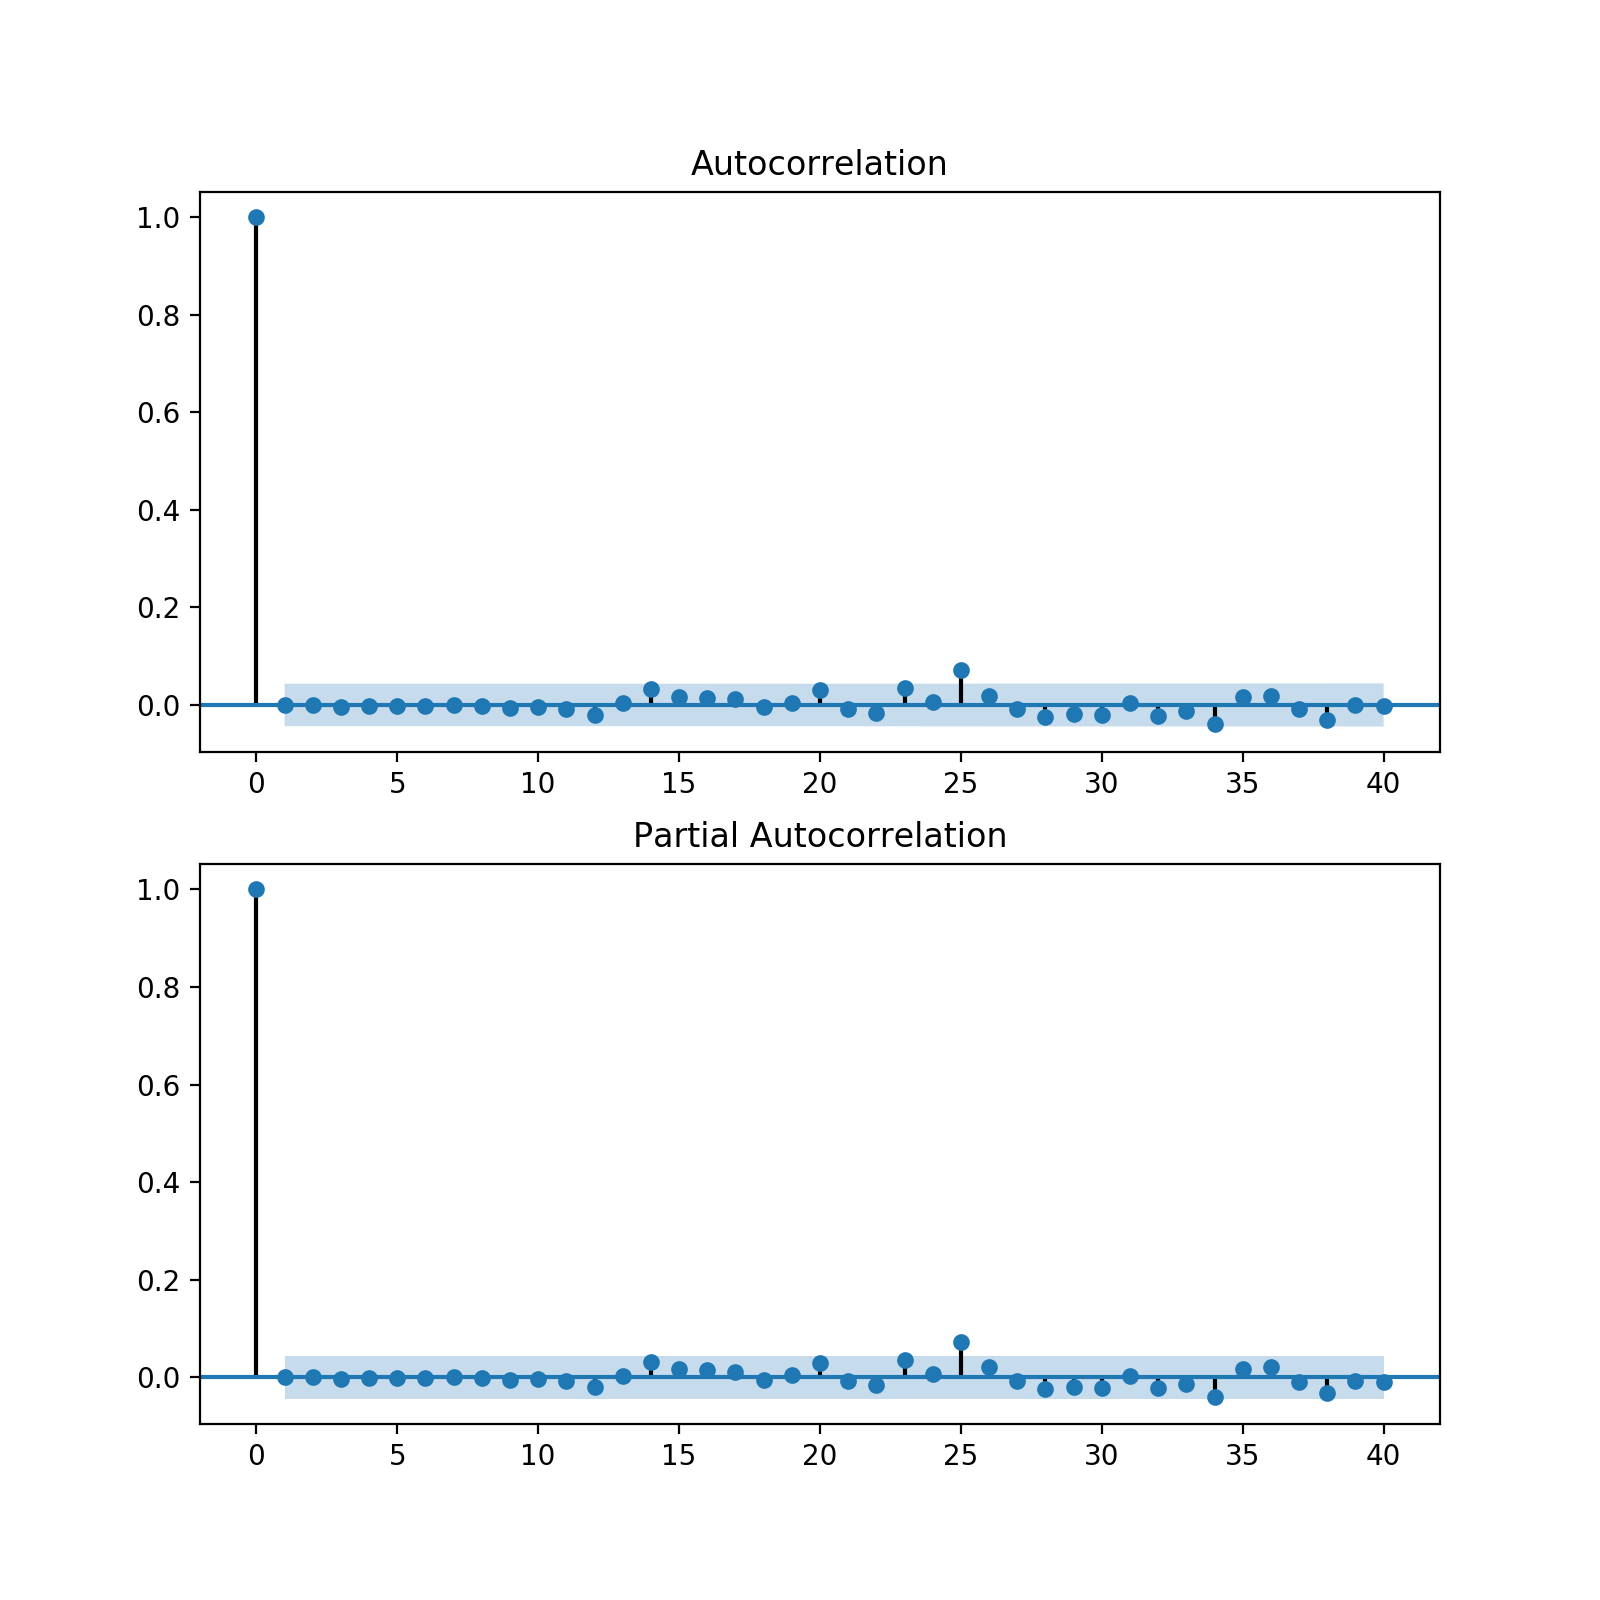

In [114]:
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(travel_ts.resid.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(travel_ts.resid, lags=40, ax=ax2)
fig

In [115]:
travel_ts.aic

17375.339191607658

<IPython.core.display.Javascript object>


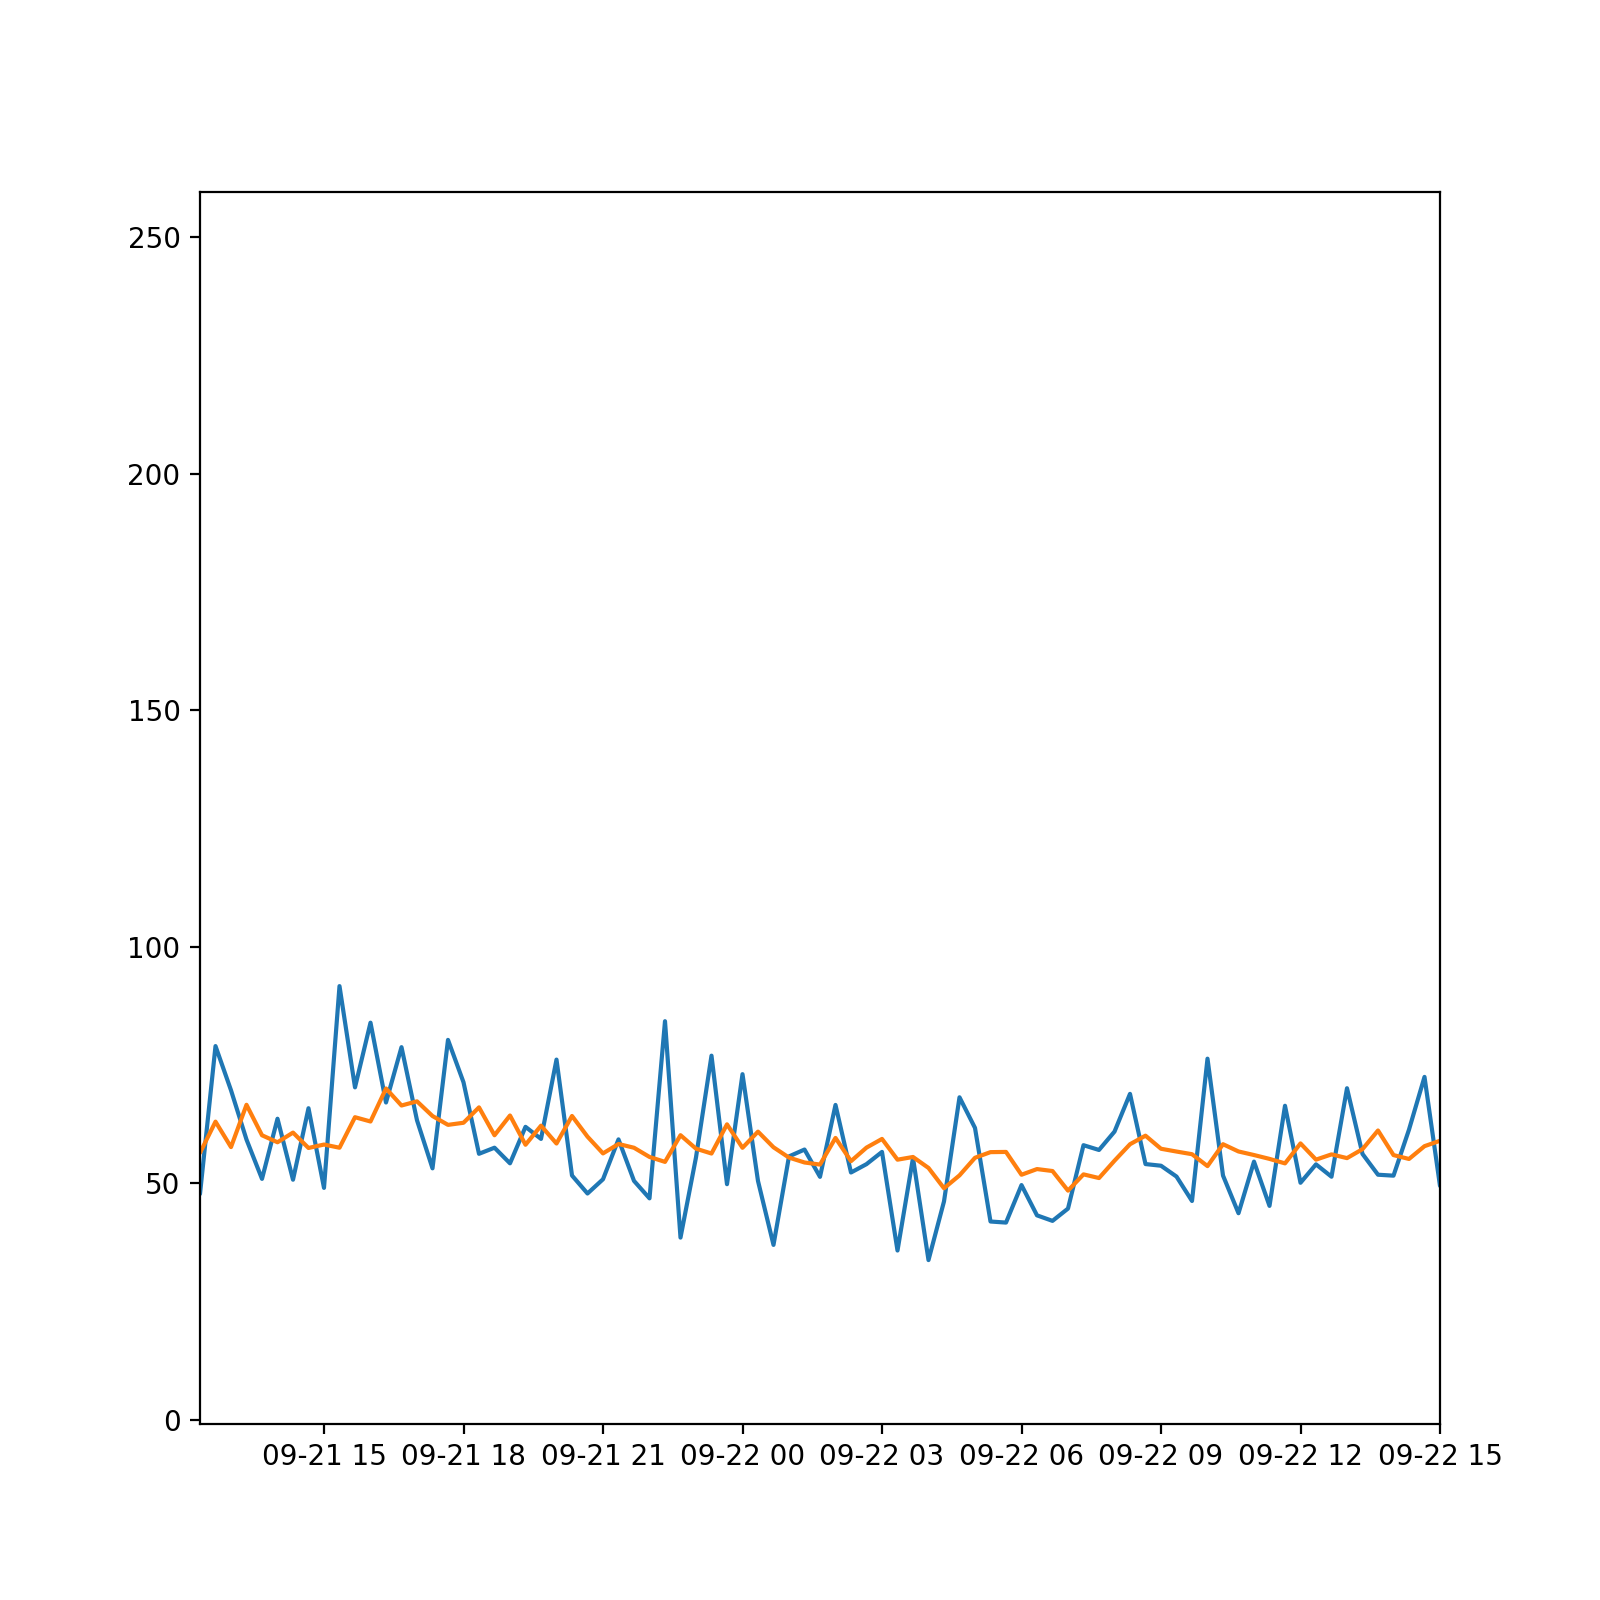

In [116]:
fig = plt.figure(figsize=(8, 8))
plt.plot(travel_time)
plt.plot(travel_ts.fittedvalues)
t_index = 109
plt.xlim(travel_time_index[t_index], travel_time_index[t_index+80])
plt.show()

In [65]:
travel_time

2016-09-20 00:00:00    65.7750
2016-09-20 00:20:00    54.1800
2016-09-20 00:40:00    54.3300
2016-09-20 01:00:00    54.2550
2016-09-20 01:20:00    50.9100
2016-09-20 01:40:00    58.8500
2016-09-20 02:00:00    55.5225
2016-09-20 02:20:00    75.6400
2016-09-20 02:40:00    54.0850
2016-09-20 03:00:00    44.1050
2016-09-20 03:20:00    46.0100
2016-09-20 03:40:00    75.4600
2016-09-20 04:00:00    43.5800
2016-09-20 04:20:00    60.9400
2016-09-20 04:40:00    47.3200
2016-09-20 05:00:00    55.5225
2016-09-20 05:20:00    49.9600
2016-09-20 05:40:00    47.7750
2016-09-20 06:00:00    56.6700
2016-09-20 06:20:00    93.1900
2016-09-20 06:40:00    41.0900
2016-09-20 07:00:00    71.1400
2016-09-20 07:20:00    55.6600
2016-09-20 07:40:00    56.3250
2016-09-20 08:00:00    59.7200
2016-09-20 08:20:00    49.5200
2016-09-20 08:40:00    82.3100
2016-09-20 09:00:00    67.6900
2016-09-20 09:20:00    60.0600
2016-09-20 09:40:00    82.4500
                        ...   
2016-10-17 17:00:00    67.9800
2016-10-

In [29]:
travel_ts.params

const      58.523885
ar.L1.y     0.860928
ma.L1.y    -0.674541
dtype: float64

In [30]:
travel_ts.predict()

2016-09-20 00:00:00    58.523885
2016-09-20 00:20:00    60.454269
2016-09-20 00:40:00    58.800102
2016-09-20 01:00:00    57.860004
2016-09-20 01:20:00    57.255519
2016-09-20 01:40:00    56.229349
2016-09-20 02:00:00    57.040631
2016-09-20 02:20:00    56.962969
2016-09-20 02:40:00    60.666700
2016-09-20 03:00:00    59.141068
2016-09-20 03:20:00    56.251781
2016-09-20 03:40:00    54.658540
2016-09-20 04:00:00    59.073501
2016-09-20 04:20:00    56.109176
2016-09-20 04:40:00    57.345413
2016-09-20 05:00:00    55.640678
2016-09-20 05:20:00    56.019623
2016-09-20 05:40:00    55.238453
2016-09-20 06:00:00    54.304265
2016-09-20 06:20:00    55.332039
2016-09-20 06:40:00    62.832200
2016-09-20 07:00:00    58.180553
2016-09-20 07:20:00    60.643784
2016-09-20 07:40:00    59.420050
2016-09-20 08:00:00    58.718539
2016-09-20 08:20:00    58.878128
2016-09-20 08:40:00    57.084621
2016-09-20 09:00:00    61.986487
2016-09-20 09:20:00    62.568003
2016-09-20 09:40:00    61.538119
          

## predicting the next two hour travel time

In [31]:
travel_ts.predict(travel_time_index[-1]+timedelta(minutes=20),travel_time_index[-1]+6*timedelta(minutes=20))



2016-10-18 03:00:00    56.371474
2016-10-18 03:20:00    56.670813
2016-10-18 03:40:00    56.928523
2016-10-18 04:00:00    57.150392
2016-10-18 04:20:00    57.341406
2016-10-18 04:40:00    57.505855
Freq: 20T, dtype: float64